# Diabetes Prediction with PyTorch

In the previous notebook, I went through the process of cleaning the data from the Behavioral Risk Factor Surveillance System (BRFSS) for 2020 and testing a few classication algorithms to predict the likelihood of having or developing diabetes. The accuracy score was around 73% and we ended with quite a number of False Positives and False Negatives. The purpose of this notebook is to see if I can improve the accuracy by using PyTorch for deep learning.

## 1. Importing the necessary libraries

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [66]:
#import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
import io
import time
sns.set(style='ticks')
sns.set_style("darkgrid")

## 2. Reading in the Data

In [67]:
#Reading in the CSV saved from pervious notebook
final_df = pd.read_csv('final_df.csv', sep='\t', encoding='utf-8')


In [68]:
final_df.head()

,Diabetes,Age,Race,Birth_Sex,Education,Income,Marital,General_Health,Physical_Health,Health_Coverage,Smoker,Drinker,Physical_Activity,Medical_Cost,Overweight,Heart_Disease
0,1.0,5.0,1.0,0.0,6.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
1,1.0,6.0,1.0,1.0,4.0,5.0,4.0,4.0,20.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0
2,1.0,6.0,1.0,0.0,5.0,4.0,3.0,3.0,5.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0
3,1.0,6.0,1.0,1.0,6.0,7.0,1.0,2.0,0.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0
4,1.0,6.0,2.0,0.0,4.0,2.0,3.0,4.0,0.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0


## 3. Split Data into Training and Testing Set

In [69]:
#Separate dataset into labels and features. Label is the diabetes column
X = np.array(final_df.drop(['Diabetes'], axis=1))
y = np.array(final_df['Diabetes'])

In [70]:
#split dataset into training and testing for models
#can add random_state=<some value>. This would ensure we get the same sets each time
#70% for the train and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True, random_state=10)

In [71]:
# The next step is to create our tensors tensors
X_train_t = torch.FloatTensor(X_train)
X_test_t = torch.FloatTensor(X_test)
y_train_t = torch.LongTensor(y_train)
y_test_t = torch.LongTensor(y_test)

In [72]:
#Checking one of the Tensors
X_train_t

tensor([[4., 1., 1.,  ..., 2., 1., 2.],
        [5., 1., 1.,  ..., 2., 2., 2.],
        [5., 2., 0.,  ..., 2., 2., 2.],
        ...,
        [6., 1., 0.,  ..., 2., 2., 2.],
        [4., 1., 0.,  ..., 2., 2., 2.],
        [5., 1., 0.,  ..., 2., 1., 2.]])

## 4. Building and Training Artificial Neural Network Model

In [73]:
# creating model with PyTorch. DEfine the class
#We have 15 features on input=15 and 2 hidden layers (30 inputs each) and out_put = 2
class ANN_Model(nn.Module):
    def __init__(self, input_features=15, hidden1=64, hidden2=128, out_features=2):
        super().__init__()
        self.f_connected1 =  nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [74]:
# instantiate my model
torch.manual_seed(20)
model = ANN_Model()

In [75]:
#check the model parameters
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=15, out_features=64, bias=True)
  (f_connected2): Linear(in_features=64, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=2, bias=True)
)>

In [76]:
## Backward propogation -- Define the loss_function and define the optimizer
#model.parameters() will return a generator that's why we used the brackets
loss_function = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [77]:
#trigger the propogation
epochs=1000
final_losses=[]
for i in range(epochs):
    i = i+1
    y_pred = model.forward(X_train_t)
    loss=loss_function(y_pred, y_train_t)
    final_losses.append(loss.item())
    if i%10==1:
        print("Epoch number: {} and the loss: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss: 0.7230020761489868
Epoch number: 11 and the loss: 0.6019874215126038
Epoch number: 21 and the loss: 0.5560014843940735
Epoch number: 31 and the loss: 0.5427707433700562
Epoch number: 41 and the loss: 0.5352184772491455
Epoch number: 51 and the loss: 0.5310775637626648
Epoch number: 61 and the loss: 0.5293008089065552
Epoch number: 71 and the loss: 0.5286121368408203
Epoch number: 81 and the loss: 0.5280584692955017
Epoch number: 91 and the loss: 0.5269811749458313
Epoch number: 101 and the loss: 0.526321530342102
Epoch number: 111 and the loss: 0.5258094668388367
Epoch number: 121 and the loss: 0.5249330997467041
Epoch number: 131 and the loss: 0.5246785879135132
Epoch number: 141 and the loss: 0.5239773392677307
Epoch number: 151 and the loss: 0.5236549973487854
Epoch number: 161 and the loss: 0.5240423083305359
Epoch number: 171 and the loss: 0.5247637629508972
Epoch number: 181 and the loss: 0.5226103663444519
Epoch number: 191 and the loss: 0.522369444

Text(0.5, 0, 'Epoch')

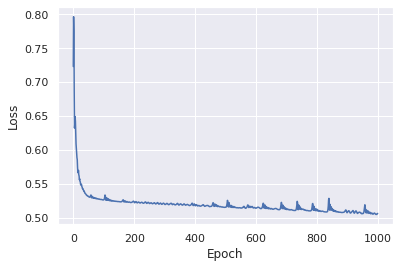

In [78]:
#plot the loss function
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

## 5. Testing Model

In [79]:
#create prediction with with X_test_t
#Don't need gradient for this
test_predictions = []
with torch.no_grad():
  for i, value in enumerate(X_test_t):
    y_pred = model(value)
    test_predictions.append(y_pred.argmax().item())

In [80]:
#zipping actual value and predictions
#since we need two arrays, we convert the tensor to a numpy array
zipped_values = zip(y_test_t.numpy(), test_predictions)

In [81]:
#look at the first 5 predictions
list(zipped_values)[:5]


[(0, 0), (0, 0), (0, 0), (1, 1), (0, 0)]

In [82]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test_t.numpy(),test_predictions)
m

array([[7758, 3003],
       [2707, 7924]])

In [83]:
#check accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test_t.numpy(), test_predictions)
score

0.7330777860882572

## 6. Conclusion

With the use of PyTorch, I basically did not see any improvement. Actually, the Logistic Regression model gave a slightly better performance. However, there are things that I can play around with to see if the accuracy and other assessment metrics can be improved.
I could make the network be a little deeper than just using 2 hidden layers. This also means that I would increase the number epochs. This might take some while to run and because this notebook runs on my laptop, I will leave that for future exploration.